In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression #For classification task
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay, roc_curve
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [223]:
df = pd.read_csv("../Datasets/post_pandemic_remote_work_health_impact_2025.csv")

In [224]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [226]:
df.duplicated().sum()

np.int64(0)

In [227]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [228]:
df.isna().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

### DATA CLEANING 

In [229]:
#changing the data type of the survey_Date from int64 to datetime

df['Survey_Date'] =  pd.to_datetime(df['Survey_Date'])

#about 38% of the mental_health_status data is missing, it is more reasonable to input with unknown, cause it is frequent.  
df['Mental_Health_Status'] = df['Mental_Health_Status'].fillna('Unknown')

#11% of the physical_health_issues is missing, I could fill with mode, but the top few are in close frequency -- it is better to go with unknown too. 
df['Physical_Health_Issues'] = df['Physical_Health_Issues'].fillna('Unknown')

In [230]:
df.isna().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

In [231]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,Unknown,Medium,5,Unknown,4,$60K-80K


### EXPLORATORY DATA ANALYSIS 

#### UNIVARIATE ANALYSIS

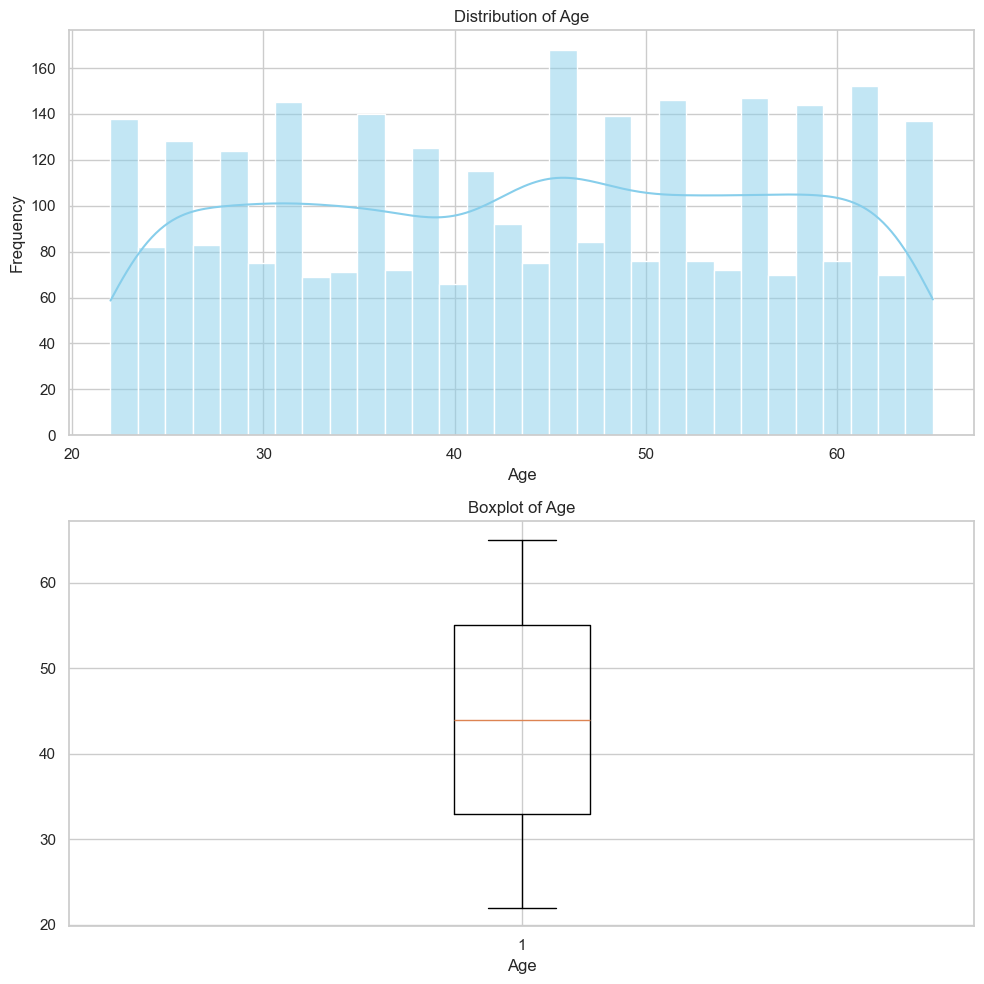

In [232]:
# AGE 
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.histplot(data=df, x='Age',bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)

plt.tight_layout()
plt.show()


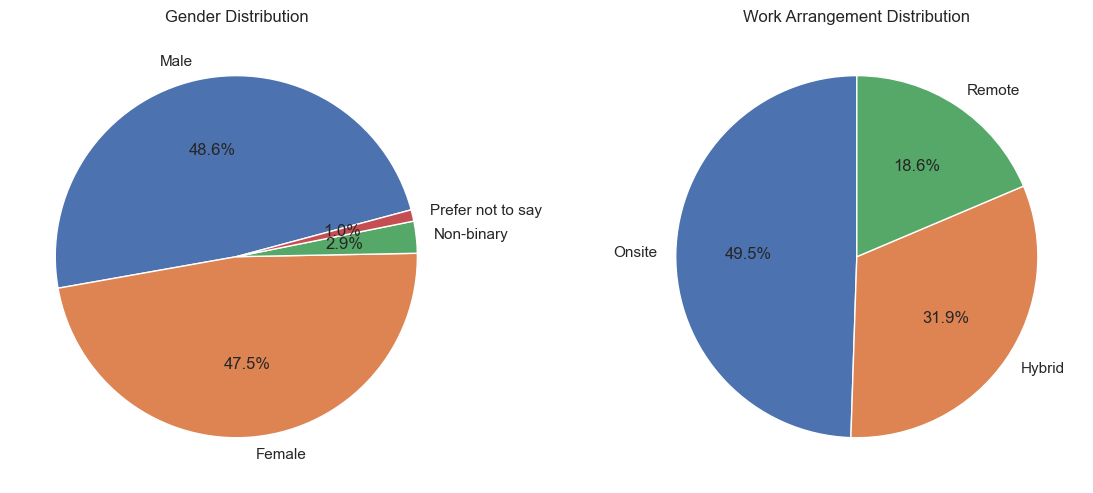

In [233]:
# GENDER AND WORK ARRANGEMENT ANALYSIS
# Analysis with Numpy
gender_count = df['Gender'].value_counts()
work_count = df['Work_Arrangement'].value_counts()

gender_label = gender_count.index.to_numpy()
gender_sizes = gender_count.values

work_label = work_count.index.to_numpy()
work_sizes = work_count.values

#Gender and Work Arrangement Visualization
plt.figure(figsize=(25, 10))

plt.subplot(2, 1, 1)
plt.pie(gender_sizes, labels=gender_label, autopct='%1.1f%%', startangle=15)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
plt.pie(work_sizes, labels=work_label, autopct='%1.1f%%', startangle=90)
plt.title('Work Arrangement Distribution')
plt.tight_layout()
plt.show()

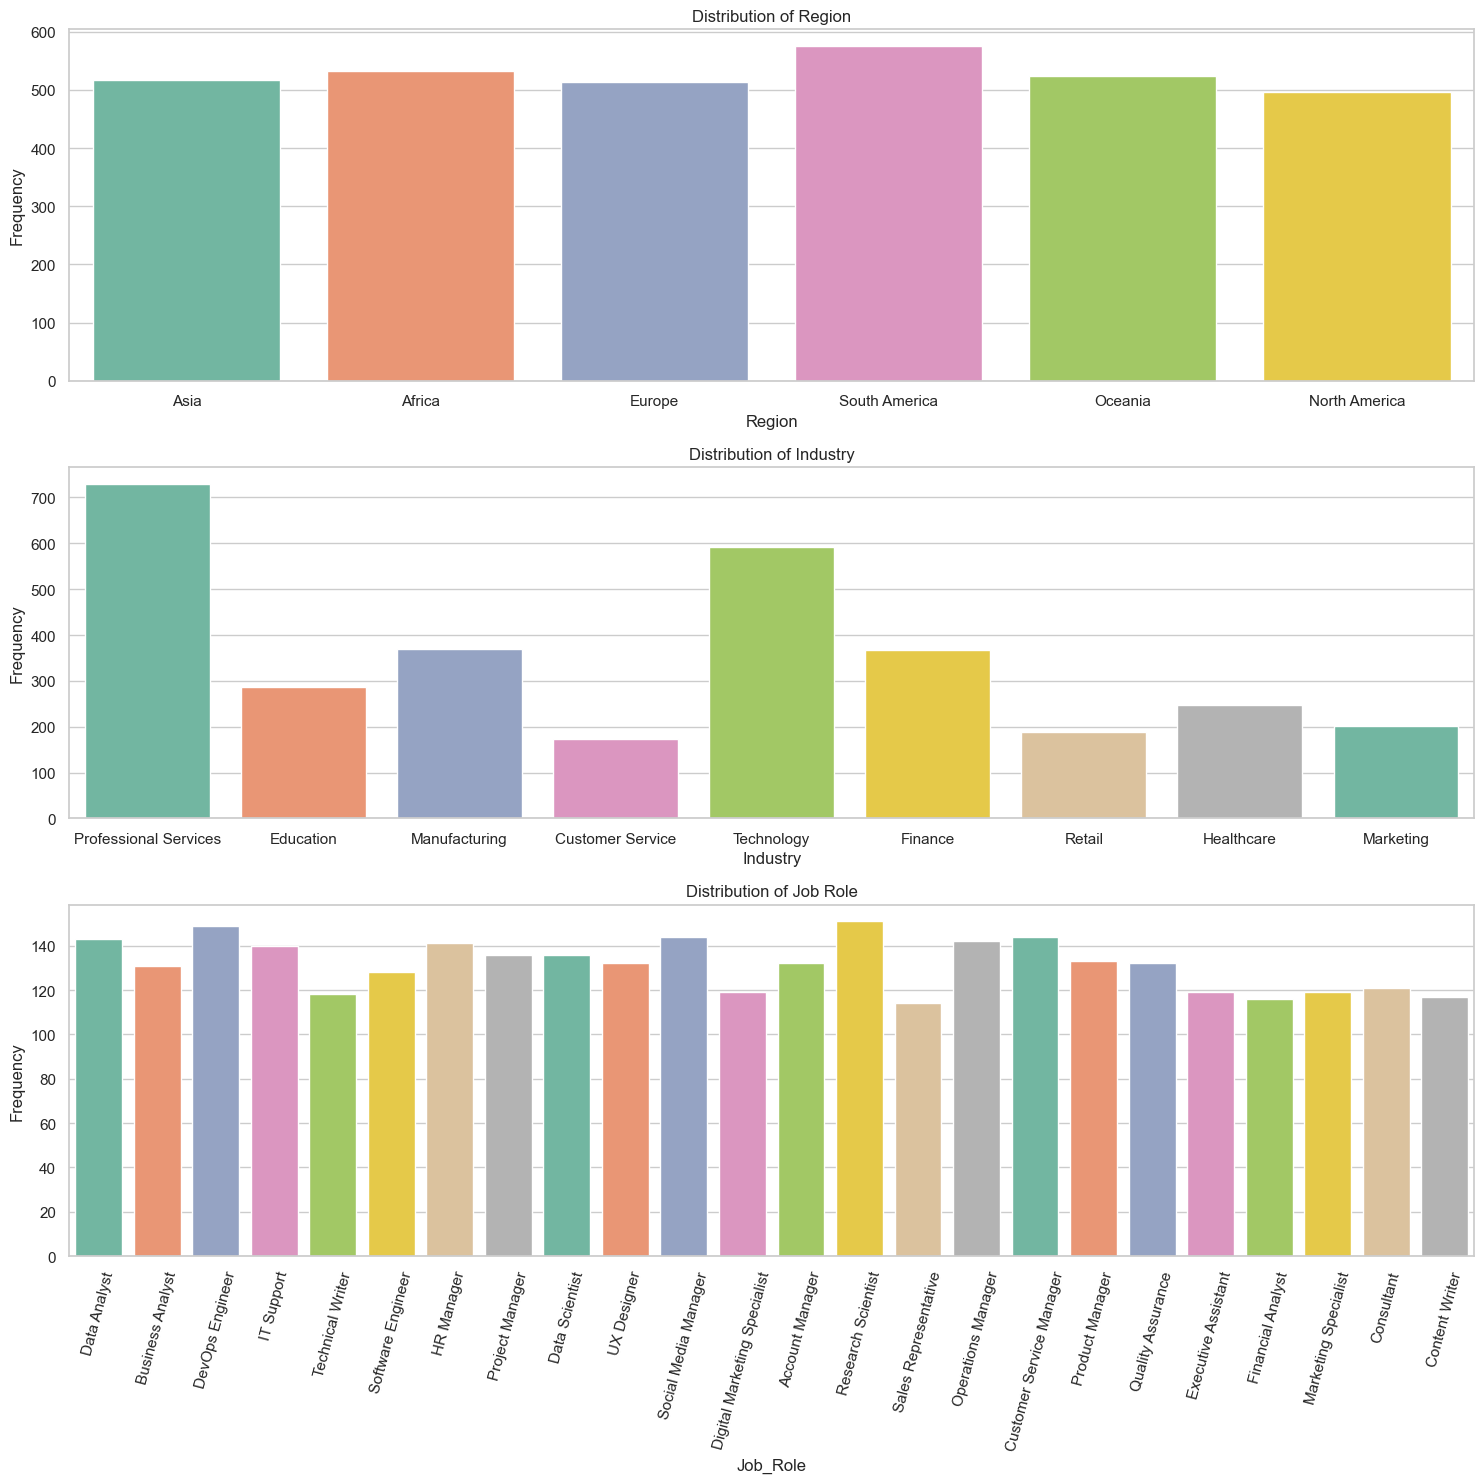

In [292]:
# Region, Industry, Job Roles Analysis

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.countplot( data=df, x='Region', palette='Set2')
plt.title('Distribution of Region')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
sns.countplot( data=df, x='Industry', palette='Set2')
plt.title('Distribution of Industry')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.countplot( data=df,  x='Job_Role', palette='Set2')
plt.title('Distribution of Job Role')
plt.ylabel('Frequency')
plt.xticks(rotation= 75)

plt.tight_layout()
plt.show()

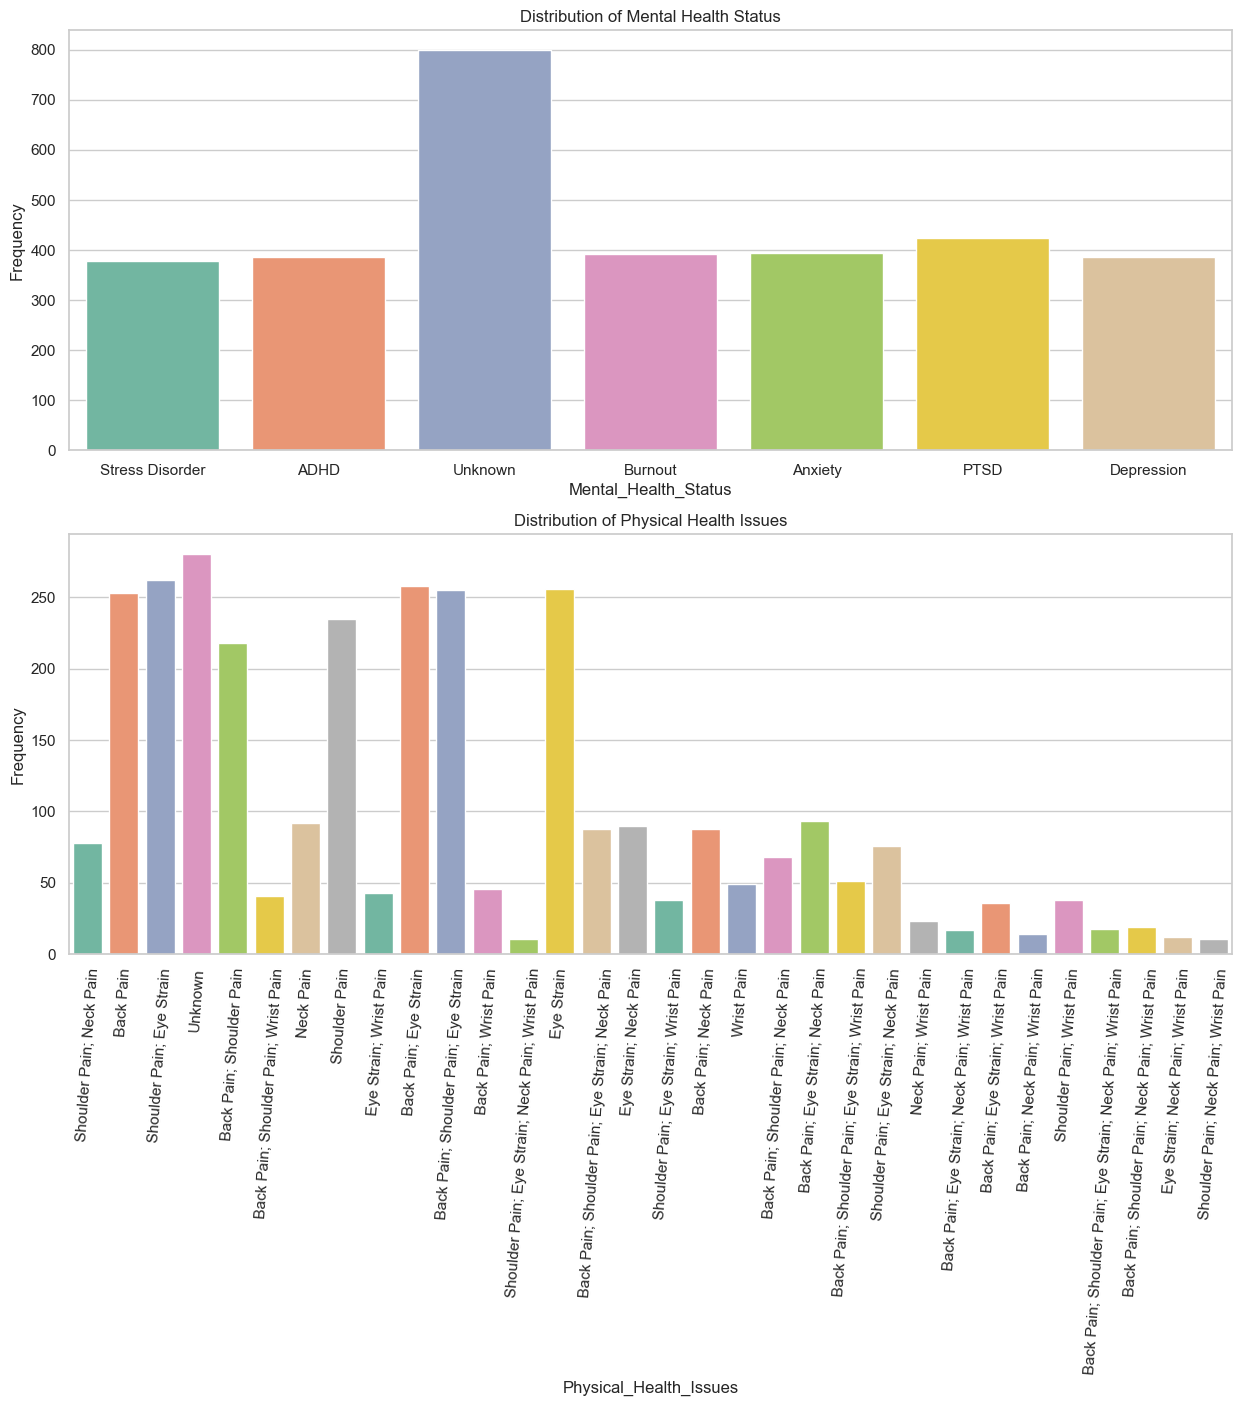

In [295]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.countplot( data=df, x='Mental_Health_Status', palette='Set2')
plt.title('Distribution of Mental Health Status')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
sns.countplot( data=df, x='Physical_Health_Issues', palette='Set2')
plt.title('Distribution of Physical Health Issues')
plt.ylabel('Frequency')
plt.xticks(rotation= 86)

plt.show()
plt.show()



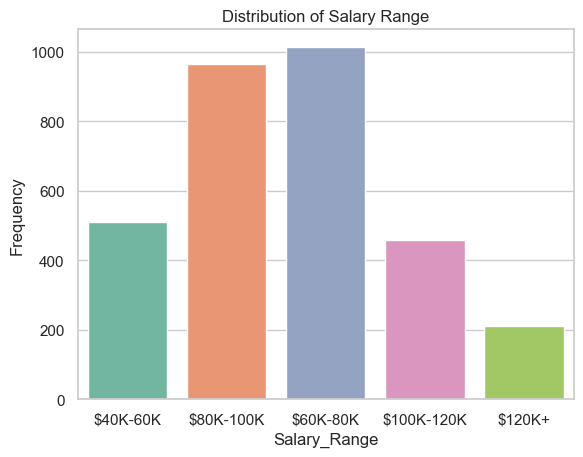

In [297]:
sns.countplot( data=df, x='Salary_Range', palette='Set2')
plt.title('Distribution of Salary Range')
plt.ylabel('Frequency')
plt.xticks()

plt.show()

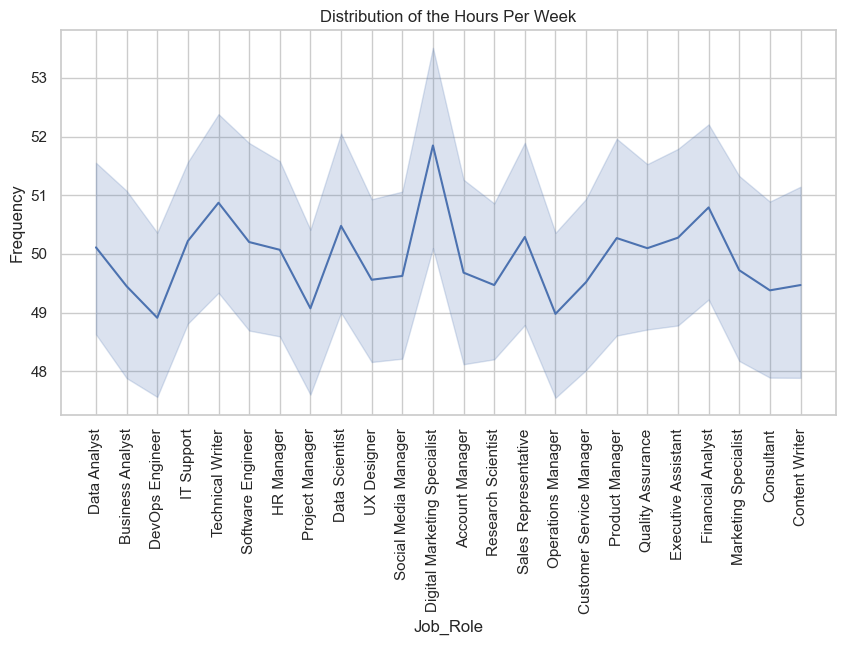

In [253]:
#df['Hours_Per_Week'] = df['Hours_Per_Week'].sort_values
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Job_Role', y='Hours_Per_Week', markers='o')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Distribution of the Hours Per Week')

plt.show()



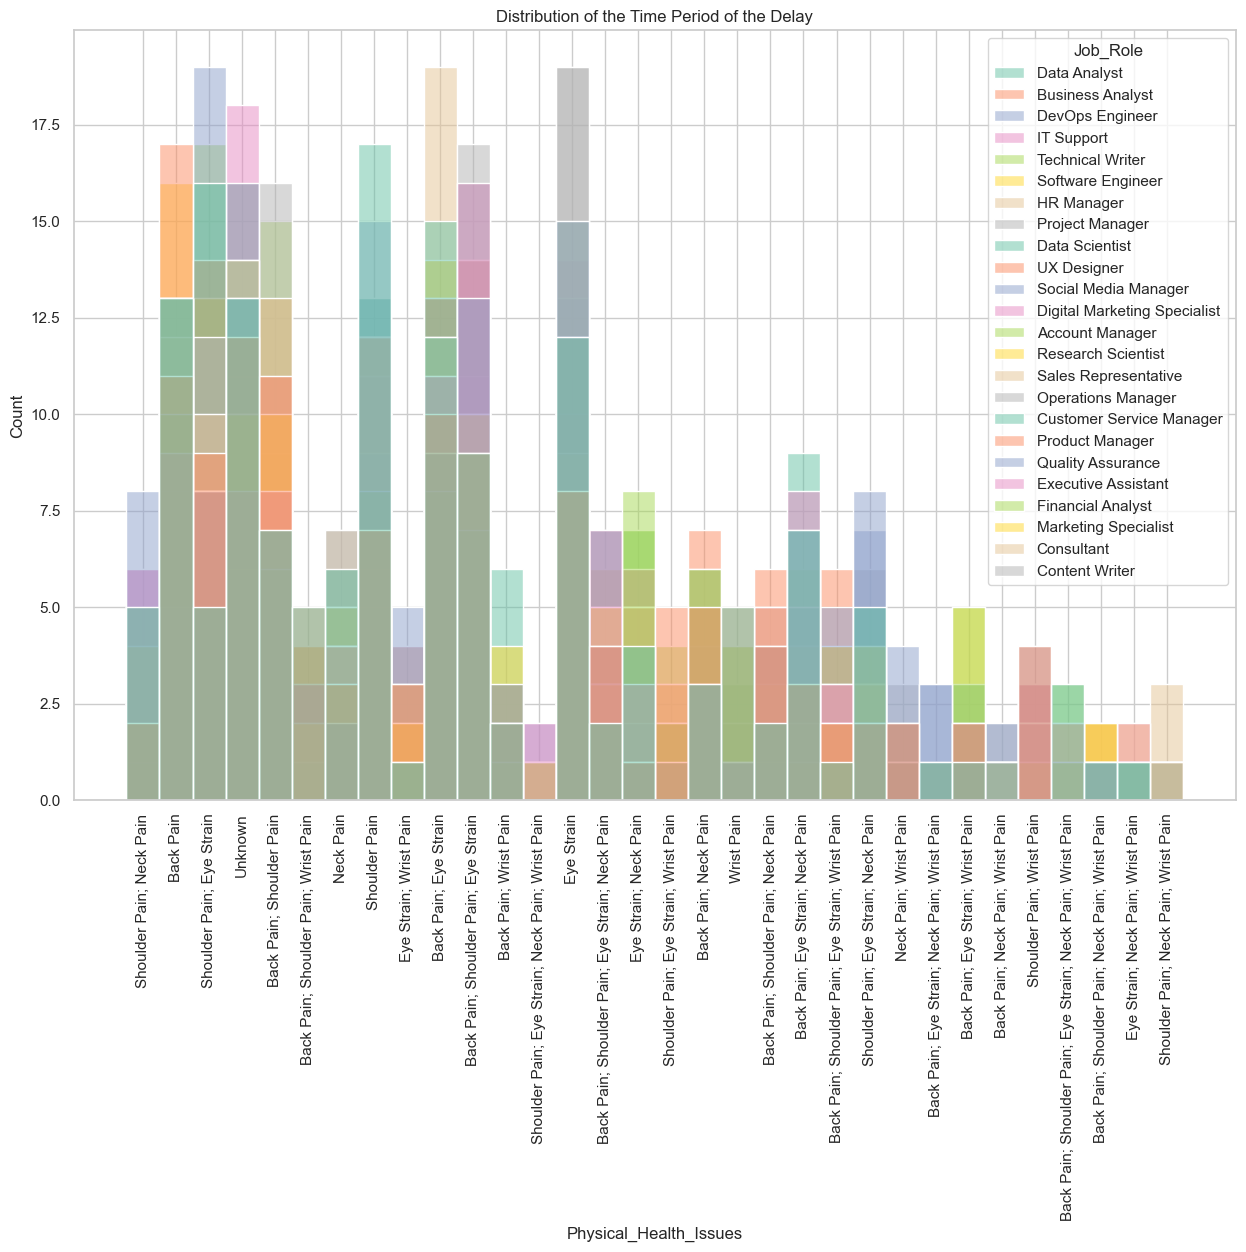

In [235]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x= "Physical_Health_Issues",hue="Job_Role", palette="Set2")
plt.title("Distribution of the Time Period of the Delay")

plt.xticks(rotation= 90)
plt.show()